# Best model per Coutry

In the end I might need to do everything per country.<BR />
And only use the stong countries (if any) to look at what mood the country and the artists are and the try to combine

## Import stuff

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('seaborn-bright')

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Load data

In [26]:
data = pd.read_csv('./data_top10c_more_lyrics.csv')
data.head(3)

,Unnamed: 0,Position,Streams,Track Name,Artist,ID,Date,Year,Month,Day,Country,Region,Lyrics,Acousticness,Energy,Instrumentalness,Mode,Tempo,Valence
0,0,177,40381,Bye Bye Bye,*NSYNC,4r8lRYnoOGdEi6YyI5OC1o,2017-10-05,2017,10,5,gb,eu,"hey, hey bye bye bye, bye bye bye bye i'm doi...",0.0408,0.928,0.00104,0.0,172.656,0.879
1,1,151,24132,"Merry Christmas, Happy Holidays",*NSYNC,15coTBAzEN1bOeipoNDZAR,2017-12-23,2017,12,23,it,eu,merry christmas and happy holidays merry chris...,0.1030,0.939,0.00000,1.0,105.003,0.756
2,2,78,49766,"Merry Christmas, Happy Holidays",*NSYNC,15coTBAzEN1bOeipoNDZAR,2017-12-24,2017,12,24,it,eu,merry christmas and happy holidays merry chris...,0.1030,0.939,0.00000,1.0,105.003,0.756


### Look at each country individually

In [27]:
data['Country'].unique()

array(['gb', 'it', 'us', 'de', 'ca', 'nl', 'au', 'fr'], dtype=object)

In [28]:
# filter by country and make 8 new data frames
gb_data = data[data['Country'] == 'gb']
it_data = data[data['Country'] == 'it']
us_data = data[data['Country'] == 'us']
de_data = data[data['Country'] == 'de']
ca_data = data[data['Country'] == 'ca']
nl_data = data[data['Country'] == 'nl']
au_data = data[data['Country'] == 'au']
fr_data = data[data['Country'] == 'fr']

## Fix a little bit with the data

#### Group by ID, sum()

In [29]:
gb_data_groupbyID = gb_data.groupby('ID').sum()
it_data_groupbyID = it_data.groupby('ID').sum()
us_data_groupbyID = us_data.groupby('ID').sum()
de_data_groupbyID = de_data.groupby('ID').sum()
ca_data_groupbyID = ca_data.groupby('ID').sum()
nl_data_groupbyID = nl_data.groupby('ID').sum()
au_data_groupbyID = au_data.groupby('ID').sum()
fr_data_groupbyID = fr_data.groupby('ID').sum()

#### Make 2 new columns for average Streams and average Position

In [30]:
gb_data_groupbyID['avg_Streams'] = gb_data_groupbyID['Streams']/len(gb_data)
gb_data_groupbyID['avg_Position'] = gb_data_groupbyID['Position']/len(gb_data)

it_data_groupbyID['avg_Streams'] = it_data_groupbyID['Streams']/len(it_data)
it_data_groupbyID['avg_Position'] = it_data_groupbyID['Position']/len(it_data)

us_data_groupbyID['avg_Streams'] = us_data_groupbyID['Streams']/len(us_data)
us_data_groupbyID['avg_Position'] = us_data_groupbyID['Position']/len(us_data)

de_data_groupbyID['avg_Streams'] = de_data_groupbyID['Streams']/len(de_data)
de_data_groupbyID['avg_Position'] = de_data_groupbyID['Position']/len(de_data)

ca_data_groupbyID['avg_Streams'] = ca_data_groupbyID['Streams']/len(ca_data)
ca_data_groupbyID['avg_Position'] = ca_data_groupbyID['Position']/len(ca_data)

nl_data_groupbyID['avg_Streams'] = nl_data_groupbyID['Streams']/len(nl_data)
nl_data_groupbyID['avg_Position'] = nl_data_groupbyID['Position']/len(nl_data)

au_data_groupbyID['avg_Streams'] = au_data_groupbyID['Streams']/len(au_data)
au_data_groupbyID['avg_Position'] = au_data_groupbyID['Position']/len(au_data)

fr_data_groupbyID['avg_Streams'] = fr_data_groupbyID['Streams']/len(fr_data)
fr_data_groupbyID['avg_Position'] = fr_data_groupbyID['Position']/len(fr_data)

In [31]:
gb_data_sp = gb_data_groupbyID.drop(['Unnamed: 0', 'Position', 'Streams', 'Year', 'Month', 'Day', 'Acousticness',
                        'Energy', 'Instrumentalness', 'Mode', 'Tempo', 'Valence'], axis=1)
it_data_sp = it_data_groupbyID.drop(['Unnamed: 0', 'Position', 'Streams', 'Year', 'Month', 'Day', 'Acousticness',
                        'Energy', 'Instrumentalness', 'Mode', 'Tempo', 'Valence'], axis=1)
us_data_sp = us_data_groupbyID.drop(['Unnamed: 0', 'Position', 'Streams', 'Year', 'Month', 'Day', 'Acousticness',
                        'Energy', 'Instrumentalness', 'Mode', 'Tempo', 'Valence'], axis=1)
de_data_sp = de_data_groupbyID.drop(['Unnamed: 0', 'Position', 'Streams', 'Year', 'Month', 'Day', 'Acousticness',
                        'Energy', 'Instrumentalness', 'Mode', 'Tempo', 'Valence'], axis=1)
ca_data_sp = ca_data_groupbyID.drop(['Unnamed: 0', 'Position', 'Streams', 'Year', 'Month', 'Day', 'Acousticness',
                        'Energy', 'Instrumentalness', 'Mode', 'Tempo', 'Valence'], axis=1)
nl_data_sp = nl_data_groupbyID.drop(['Unnamed: 0', 'Position', 'Streams', 'Year', 'Month', 'Day', 'Acousticness',
                        'Energy', 'Instrumentalness', 'Mode', 'Tempo', 'Valence'], axis=1)
au_data_sp = au_data_groupbyID.drop(['Unnamed: 0', 'Position', 'Streams', 'Year', 'Month', 'Day', 'Acousticness',
                        'Energy', 'Instrumentalness', 'Mode', 'Tempo', 'Valence'], axis=1)
fr_data_sp = fr_data_groupbyID.drop(['Unnamed: 0', 'Position', 'Streams', 'Year', 'Month', 'Day', 'Acousticness',
                        'Energy', 'Instrumentalness', 'Mode', 'Tempo', 'Valence'], axis=1)

In [32]:
# make a new column for ID so that I can merge on ID later
gb_data_sp['ID'] = gb_data_sp.index
it_data_sp['ID'] = it_data_sp.index
us_data_sp['ID'] = us_data_sp.index
de_data_sp['ID'] = de_data_sp.index
ca_data_sp['ID'] = ca_data_sp.index
nl_data_sp['ID'] = nl_data_sp.index
au_data_sp['ID'] = au_data_sp.index
fr_data_sp['ID'] = fr_data_sp.index

#### Drop rows that are duplicates and keep only one row for each song (based on ID)

In [33]:
gb_data_per_song = gb_data.drop_duplicates(subset=['ID'], keep='first')
it_data_per_song = it_data.drop_duplicates(subset=['ID'], keep='first')
us_data_per_song = us_data.drop_duplicates(subset=['ID'], keep='first')
de_data_per_song = de_data.drop_duplicates(subset=['ID'], keep='first')
ca_data_per_song = ca_data.drop_duplicates(subset=['ID'], keep='first')
nl_data_per_song = nl_data.drop_duplicates(subset=['ID'], keep='first')
au_data_per_song = au_data.drop_duplicates(subset=['ID'], keep='first')
fr_data_per_song = fr_data.drop_duplicates(subset=['ID'], keep='first')

#### Drop all columns that might change per song

In [34]:
gb_data_per_song = gb_data_per_song.drop(['Unnamed: 0', 'Position', 'Streams', 'Date', 'Year', 'Month', 'Day', 'Country',
                                   'Region'], axis=1)
it_data_per_song = it_data_per_song.drop(['Unnamed: 0', 'Position', 'Streams', 'Date', 'Year', 'Month', 'Day', 'Country',
                                   'Region'], axis=1)
us_data_per_song = us_data_per_song.drop(['Unnamed: 0', 'Position', 'Streams', 'Date', 'Year', 'Month', 'Day', 'Country',
                                   'Region'], axis=1)
de_data_per_song = de_data_per_song.drop(['Unnamed: 0', 'Position', 'Streams', 'Date', 'Year', 'Month', 'Day', 'Country',
                                   'Region'], axis=1)
ca_data_per_song = ca_data_per_song.drop(['Unnamed: 0', 'Position', 'Streams', 'Date', 'Year', 'Month', 'Day', 'Country',
                                   'Region'], axis=1)
nl_data_per_song = nl_data_per_song.drop(['Unnamed: 0', 'Position', 'Streams', 'Date', 'Year', 'Month', 'Day', 'Country',
                                   'Region'], axis=1)
au_data_per_song = au_data_per_song.drop(['Unnamed: 0', 'Position', 'Streams', 'Date', 'Year', 'Month', 'Day', 'Country',
                                   'Region'], axis=1)
fr_data_per_song = fr_data_per_song.drop(['Unnamed: 0', 'Position', 'Streams', 'Date', 'Year', 'Month', 'Day', 'Country',
                                   'Region'], axis=1)

#### Combine the 2 data frames with columns that may and may not change per song

In [35]:
gb_big_song = gb_data_per_song.merge(gb_data_sp, how='inner', on='ID')
it_big_song = it_data_per_song.merge(it_data_sp, how='inner', on='ID')
us_big_song = us_data_per_song.merge(us_data_sp, how='inner', on='ID')
de_big_song = de_data_per_song.merge(de_data_sp, how='inner', on='ID')
ca_big_song = ca_data_per_song.merge(ca_data_sp, how='inner', on='ID')
nl_big_song = nl_data_per_song.merge(nl_data_sp, how='inner', on='ID')
au_big_song = au_data_per_song.merge(au_data_sp, how='inner', on='ID')
fr_big_song = fr_data_per_song.merge(fr_data_sp, how='inner', on='ID')

**Drop rows that have missing values in the Lyrics column**<BR />
We can use dropna to drop all rows that has missing values (should mostly be the Lyrics column)

In [38]:
gb_clean = gb_big_song.dropna(axis=0, how='any')
it_clean = it_big_song.dropna(axis=0, how='any')
us_clean = us_big_song.dropna(axis=0, how='any')
de_clean = de_big_song.dropna(axis=0, how='any')
ca_clean = ca_big_song.dropna(axis=0, how='any')
nl_clean = nl_big_song.dropna(axis=0, how='any')
au_clean = au_big_song.dropna(axis=0, how='any')
fr_clean = fr_big_song.dropna(axis=0, how='any')

### TextBlob

**Turn the lyrics in the Lyrics column into string**

In [39]:
gb_clean['Lyrics'] = gb_clean['Lyrics'].astype(str)
it_clean['Lyrics'] = it_clean['Lyrics'].astype(str)
us_clean['Lyrics'] = us_clean['Lyrics'].astype(str)
de_clean['Lyrics'] = de_clean['Lyrics'].astype(str)
ca_clean['Lyrics'] = ca_clean['Lyrics'].astype(str)
nl_clean['Lyrics'] = nl_clean['Lyrics'].astype(str)
au_clean['Lyrics'] = au_clean['Lyrics'].astype(str)
fr_clean['Lyrics'] = fr_clean['Lyrics'].astype(str)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

**Make and run function for TextBlob on the Lyrics**

In [40]:
def sentiment_func(lyrics):
    try:
        return TextBlob(lyrics).sentiment
    except:
        return None

In [41]:
gb_clean['pol_sub'] = gb_clean['Lyrics'].apply(sentiment_func)
it_clean['pol_sub'] = it_clean['Lyrics'].apply(sentiment_func)
us_clean['pol_sub'] = us_clean['Lyrics'].apply(sentiment_func)
de_clean['pol_sub'] = de_clean['Lyrics'].apply(sentiment_func)
ca_clean['pol_sub'] = ca_clean['Lyrics'].apply(sentiment_func)
nl_clean['pol_sub'] = nl_clean['Lyrics'].apply(sentiment_func)
au_clean['pol_sub'] = au_clean['Lyrics'].apply(sentiment_func)
fr_clean['pol_sub'] = fr_clean['Lyrics'].apply(sentiment_func)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

**Split the pol_sub column into 2 new columns (Polarity, Subjectivity)**

In [42]:
gb_clean['Polarity'] = gb_clean['pol_sub'].apply(lambda x: x[0])
gb_clean['Subjectivity'] = gb_clean['pol_sub'].apply(lambda x: x[1])

it_clean['Polarity'] = it_clean['pol_sub'].apply(lambda x: x[0])
it_clean['Subjectivity'] = it_clean['pol_sub'].apply(lambda x: x[1])

us_clean['Polarity'] = us_clean['pol_sub'].apply(lambda x: x[0])
us_clean['Subjectivity'] = us_clean['pol_sub'].apply(lambda x: x[1])

de_clean['Polarity'] = de_clean['pol_sub'].apply(lambda x: x[0])
de_clean['Subjectivity'] = de_clean['pol_sub'].apply(lambda x: x[1])

ca_clean['Polarity'] = ca_clean['pol_sub'].apply(lambda x: x[0])
ca_clean['Subjectivity'] = ca_clean['pol_sub'].apply(lambda x: x[1])

nl_clean['Polarity'] = nl_clean['pol_sub'].apply(lambda x: x[0])
nl_clean['Subjectivity'] = nl_clean['pol_sub'].apply(lambda x: x[1])

au_clean['Polarity'] = au_clean['pol_sub'].apply(lambda x: x[0])
au_clean['Subjectivity'] = au_clean['pol_sub'].apply(lambda x: x[1])

fr_clean['Polarity'] = fr_clean['pol_sub'].apply(lambda x: x[0])
fr_clean['Subjectivity'] = fr_clean['pol_sub'].apply(lambda x: x[1])

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

**Drop the pol_sub column**

In [43]:
gb_clean = gb_clean.drop(['pol_sub'], axis=1)
it_clean = it_clean.drop(['pol_sub'], axis=1)
us_clean = us_clean.drop(['pol_sub'], axis=1)
de_clean = de_clean.drop(['pol_sub'], axis=1)
ca_clean = ca_clean.drop(['pol_sub'], axis=1)
nl_clean = nl_clean.drop(['pol_sub'], axis=1)
au_clean = au_clean.drop(['pol_sub'], axis=1)
fr_clean = fr_clean.drop(['pol_sub'], axis=1)

### Do a quick check of the entire data frame

In [44]:
gb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 2381
Data columns (total 14 columns):
Track Name          1179 non-null object
Artist              1179 non-null object
ID                  1179 non-null object
Lyrics              1179 non-null object
Acousticness        1179 non-null float64
Energy              1179 non-null float64
Instrumentalness    1179 non-null float64
Mode                1179 non-null float64
Tempo               1179 non-null float64
Valence             1179 non-null float64
avg_Streams         1179 non-null float64
avg_Position        1179 non-null float64
Polarity            1179 non-null float64
Subjectivity        1179 non-null float64
dtypes: float64(10), object(4)
memory usage: 138.2+ KB


In [45]:
it_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 0 to 1694
Data columns (total 14 columns):
Track Name          1058 non-null object
Artist              1058 non-null object
ID                  1058 non-null object
Lyrics              1058 non-null object
Acousticness        1058 non-null float64
Energy              1058 non-null float64
Instrumentalness    1058 non-null float64
Mode                1058 non-null float64
Tempo               1058 non-null float64
Valence             1058 non-null float64
avg_Streams         1058 non-null float64
avg_Position        1058 non-null float64
Polarity            1058 non-null float64
Subjectivity        1058 non-null float64
dtypes: float64(10), object(4)
memory usage: 124.0+ KB


In [46]:
us_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073 entries, 0 to 1934
Data columns (total 14 columns):
Track Name          1073 non-null object
Artist              1073 non-null object
ID                  1073 non-null object
Lyrics              1073 non-null object
Acousticness        1073 non-null float64
Energy              1073 non-null float64
Instrumentalness    1073 non-null float64
Mode                1073 non-null float64
Tempo               1073 non-null float64
Valence             1073 non-null float64
avg_Streams         1073 non-null float64
avg_Position        1073 non-null float64
Polarity            1073 non-null float64
Subjectivity        1073 non-null float64
dtypes: float64(10), object(4)
memory usage: 125.7+ KB


In [47]:
de_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1984
Data columns (total 14 columns):
Track Name          1199 non-null object
Artist              1199 non-null object
ID                  1199 non-null object
Lyrics              1199 non-null object
Acousticness        1199 non-null float64
Energy              1199 non-null float64
Instrumentalness    1199 non-null float64
Mode                1199 non-null float64
Tempo               1199 non-null float64
Valence             1199 non-null float64
avg_Streams         1199 non-null float64
avg_Position        1199 non-null float64
Polarity            1199 non-null float64
Subjectivity        1199 non-null float64
dtypes: float64(10), object(4)
memory usage: 140.5+ KB


In [48]:
ca_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 1796
Data columns (total 14 columns):
Track Name          947 non-null object
Artist              947 non-null object
ID                  947 non-null object
Lyrics              947 non-null object
Acousticness        947 non-null float64
Energy              947 non-null float64
Instrumentalness    947 non-null float64
Mode                947 non-null float64
Tempo               947 non-null float64
Valence             947 non-null float64
avg_Streams         947 non-null float64
avg_Position        947 non-null float64
Polarity            947 non-null float64
Subjectivity        947 non-null float64
dtypes: float64(10), object(4)
memory usage: 111.0+ KB


In [49]:
nl_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 0 to 2037
Data columns (total 14 columns):
Track Name          1048 non-null object
Artist              1048 non-null object
ID                  1048 non-null object
Lyrics              1048 non-null object
Acousticness        1048 non-null float64
Energy              1048 non-null float64
Instrumentalness    1048 non-null float64
Mode                1048 non-null float64
Tempo               1048 non-null float64
Valence             1048 non-null float64
avg_Streams         1048 non-null float64
avg_Position        1048 non-null float64
Polarity            1048 non-null float64
Subjectivity        1048 non-null float64
dtypes: float64(10), object(4)
memory usage: 122.8+ KB


In [50]:
au_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 1486
Data columns (total 14 columns):
Track Name          757 non-null object
Artist              757 non-null object
ID                  757 non-null object
Lyrics              757 non-null object
Acousticness        757 non-null float64
Energy              757 non-null float64
Instrumentalness    757 non-null float64
Mode                757 non-null float64
Tempo               757 non-null float64
Valence             757 non-null float64
avg_Streams         757 non-null float64
avg_Position        757 non-null float64
Polarity            757 non-null float64
Subjectivity        757 non-null float64
dtypes: float64(10), object(4)
memory usage: 88.7+ KB


In [51]:
fr_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 1 to 1800
Data columns (total 14 columns):
Track Name          1400 non-null object
Artist              1400 non-null object
ID                  1400 non-null object
Lyrics              1400 non-null object
Acousticness        1400 non-null float64
Energy              1400 non-null float64
Instrumentalness    1400 non-null float64
Mode                1400 non-null float64
Tempo               1400 non-null float64
Valence             1400 non-null float64
avg_Streams         1400 non-null float64
avg_Position        1400 non-null float64
Polarity            1400 non-null float64
Subjectivity        1400 non-null float64
dtypes: float64(10), object(4)
memory usage: 164.1+ KB


## Train/Test-split

Divide the data into a train and a test set (with a test set of 25%, which is also default)

In [52]:
gb_dep   = gb_clean['Valence']
gb_indep = gb_clean
gb_indep_train, gb_indep_test, gb_dep_train, gb_dep_test = train_test_split(gb_indep, gb_dep, test_size = 0.25,
                                                                            random_state=24)

it_dep   = it_clean['Valence']
it_indep = it_clean
it_indep_train, it_indep_test, it_dep_train, it_dep_test = train_test_split(it_indep, it_dep, test_size = 0.25,
                                                                            random_state=24)

us_dep   = us_clean['Valence']
us_indep = us_clean
us_indep_train, us_indep_test, us_dep_train, us_dep_test = train_test_split(us_indep, us_dep, test_size = 0.25,
                                                                            random_state=24)

de_dep   = de_clean['Valence']
de_indep = de_clean
de_indep_train, de_indep_test, de_dep_train, de_dep_test = train_test_split(de_indep, de_dep, test_size = 0.25,
                                                                            random_state=24)

ca_dep   = ca_clean['Valence']
ca_indep = ca_clean
ca_indep_train, ca_indep_test, ca_dep_train, ca_dep_test = train_test_split(ca_indep, ca_dep, test_size = 0.25,
                                                                            random_state=24)

nl_dep   = nl_clean['Valence']
nl_indep = nl_clean
nl_indep_train, nl_indep_test, nl_dep_train, nl_dep_test = train_test_split(nl_indep, nl_dep, test_size = 0.25,
                                                                            random_state=24)

au_dep   = au_clean['Valence']
au_indep = au_clean
au_indep_train, au_indep_test, au_dep_train, au_dep_test = train_test_split(au_indep, au_dep, test_size = 0.25,
                                                                            random_state=24)

fr_dep   = fr_clean['Valence']
fr_indep = fr_clean
fr_indep_train, fr_indep_test, fr_dep_train, fr_dep_test = train_test_split(fr_indep, fr_dep, test_size = 0.25,
                                                                            random_state=24)

## NLP

In [53]:
# read in csv with stop words
stop_words_df = pd.read_csv('./stop_words.csv')

In [54]:
# turn the df to list
stop_words = stop_words_df['colummn'].tolist()

### CountVectorizer (use in model 1)

In [55]:
# instantiate the model
cvec = CountVectorizer(stop_words = stop_words, max_features = 1000) 

GB

In [56]:
# fit the count vectorizer with training data. 
cvec.fit(gb_indep_train['Lyrics'])
# transform X_train
gb_cvec = cvec.transform(gb_indep_train['Lyrics'])
# Turn the features into a data frame
gb_df  = pd.DataFrame(gb_cvec.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for fitting the model
gb_indep_train_cvec = pd.concat([gb_indep_train.reset_index(drop=True), gb_df], axis=1)
# transform X_test
gb_cvec2 = cvec.transform(gb_indep_test['Lyrics'])
# Turn the features into a data frame
gb_df2  = pd.DataFrame(gb_cvec2.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for scoring the model
gb_indep_test_cvec = pd.concat([gb_indep_test.reset_index(drop=True), gb_df2 ], axis=1)

IT

In [57]:
# fit the count vectorizer with training data. 
cvec.fit(it_indep_train['Lyrics'])
# transform X_train
it_cvec = cvec.transform(it_indep_train['Lyrics'])
# Turn the features into a data frame
it_df  = pd.DataFrame(it_cvec.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for fitting the model
it_indep_train_cvec = pd.concat([it_indep_train.reset_index(drop=True), it_df], axis=1)
# transform X_test
it_cvec2 = cvec.transform(it_indep_test['Lyrics'])
# Turn the features into a data frame
it_df2  = pd.DataFrame(it_cvec2.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for scoring the model
it_indep_test_cvec = pd.concat([it_indep_test.reset_index(drop=True), it_df2 ], axis=1)

US

In [58]:
# fit the count vectorizer with training data. 
cvec.fit(us_indep_train['Lyrics'])
# transform X_train
us_cvec = cvec.transform(us_indep_train['Lyrics'])
# Turn the features into a data frame
us_df  = pd.DataFrame(us_cvec.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for fitting the model
us_indep_train_cvec = pd.concat([us_indep_train.reset_index(drop=True), us_df], axis=1)
# transform X_test
us_cvec2 = cvec.transform(us_indep_test['Lyrics'])
# Turn the features into a data frame
us_df2  = pd.DataFrame(us_cvec2.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for scoring the model
us_indep_test_cvec = pd.concat([us_indep_test.reset_index(drop=True), us_df2 ], axis=1)

DE

In [59]:
# fit the count vectorizer with training data. 
cvec.fit(de_indep_train['Lyrics'])
# transform X_train
de_cvec = cvec.transform(de_indep_train['Lyrics'])
# Turn the features into a data frame
de_df  = pd.DataFrame(de_cvec.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for fitting the model
de_indep_train_cvec = pd.concat([de_indep_train.reset_index(drop=True), de_df], axis=1)
# transform X_test
de_cvec2 = cvec.transform(de_indep_test['Lyrics'])
# Turn the features into a data frame
de_df2  = pd.DataFrame(de_cvec2.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for scoring the model
de_indep_test_cvec = pd.concat([de_indep_test.reset_index(drop=True), de_df2 ], axis=1)

CA

In [60]:
# fit the count vectorizer with training data. 
cvec.fit(ca_indep_train['Lyrics'])
# transform X_train
ca_cvec = cvec.transform(ca_indep_train['Lyrics'])
# Turn the features into a data frame
ca_df  = pd.DataFrame(ca_cvec.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for fitting the model
ca_indep_train_cvec = pd.concat([ca_indep_train.reset_index(drop=True), ca_df], axis=1)
# transform X_test
ca_cvec2 = cvec.transform(ca_indep_test['Lyrics'])
# Turn the features into a data frame
ca_df2  = pd.DataFrame(ca_cvec2.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for scoring the model
ca_indep_test_cvec = pd.concat([ca_indep_test.reset_index(drop=True), ca_df2 ], axis=1)

NL

In [61]:
# fit the count vectorizer with training data. 
cvec.fit(nl_indep_train['Lyrics'])
# transform X_train
nl_cvec = cvec.transform(nl_indep_train['Lyrics'])
# Turn the features into a data frame
nl_df  = pd.DataFrame(nl_cvec.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for fitting the model
nl_indep_train_cvec = pd.concat([nl_indep_train.reset_index(drop=True), nl_df], axis=1)
# transform X_test
nl_cvec2 = cvec.transform(nl_indep_test['Lyrics'])
# Turn the features into a data frame
nl_df2  = pd.DataFrame(nl_cvec2.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for scoring the model
nl_indep_test_cvec = pd.concat([nl_indep_test.reset_index(drop=True), nl_df2 ], axis=1)

AU

In [62]:
# fit the count vectorizer with training data. 
cvec.fit(au_indep_train['Lyrics'])
# transform X_train
au_cvec = cvec.transform(au_indep_train['Lyrics'])
# Turn the features into a data frame
au_df  = pd.DataFrame(au_cvec.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for fitting the model
au_indep_train_cvec = pd.concat([au_indep_train.reset_index(drop=True), au_df], axis=1)
# transform X_test
au_cvec2 = cvec.transform(au_indep_test['Lyrics'])
# Turn the features into a data frame
au_df2  = pd.DataFrame(au_cvec2.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for scoring the model
au_indep_test_cvec = pd.concat([au_indep_test.reset_index(drop=True), au_df2 ], axis=1)

FR

In [63]:
# fit the count vectorizer with training data. 
cvec.fit(fr_indep_train['Lyrics'])
# transform X_train
fr_cvec = cvec.transform(fr_indep_train['Lyrics'])
# Turn the features into a data frame
fr_df  = pd.DataFrame(fr_cvec.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for fitting the model
fr_indep_train_cvec = pd.concat([fr_indep_train.reset_index(drop=True), fr_df], axis=1)
# transform X_test
fr_cvec2 = cvec.transform(fr_indep_test['Lyrics'])
# Turn the features into a data frame
fr_df2  = pd.DataFrame(fr_cvec2.todense(),columns=cvec.get_feature_names())
# Concat with big data frame and use for scoring the model
fr_indep_test_cvec = pd.concat([fr_indep_test.reset_index(drop=True), fr_df2 ], axis=1)

### TF-IDF (use in model 2)

In [64]:
# instantiate the model
tvec = TfidfVectorizer(stop_words = stop_words, max_features = 1000) 

GB

In [65]:
# fit the count vectorizer with training data. 
tvec.fit(gb_indep_train['Lyrics'])
# transform X_train
gb_tvec = tvec.transform(gb_indep_train['Lyrics'])
# Turn the features into a data frame
gb_df  = pd.DataFrame(gb_tvec.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for fitting the model
gb_indep_train_tvec = pd.concat([gb_indep_train.reset_index(drop=True), gb_df], axis=1)
# transform X_test
gb_tvec2 = tvec.transform(gb_indep_test['Lyrics'])
# Turn the features into a data frame
gb_df2  = pd.DataFrame(gb_tvec2.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for scoring the model
gb_indep_test_tvec = pd.concat([gb_indep_test.reset_index(drop=True), gb_df2 ], axis=1)

IT

In [66]:
# fit the count vectorizer with training data. 
tvec.fit(it_indep_train['Lyrics'])
# transform X_train
it_tvec = tvec.transform(it_indep_train['Lyrics'])
# Turn the features into a data frame
it_df  = pd.DataFrame(it_tvec.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for fitting the model
it_indep_train_tvec = pd.concat([it_indep_train.reset_index(drop=True), it_df], axis=1)
# transform X_test
it_tvec2 = tvec.transform(it_indep_test['Lyrics'])
# Turn the features into a data frame
it_df2  = pd.DataFrame(it_tvec2.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for scoring the model
it_indep_test_tvec = pd.concat([it_indep_test.reset_index(drop=True), it_df2 ], axis=1)

US

In [67]:
# fit the count vectorizer with training data. 
tvec.fit(us_indep_train['Lyrics'])
# transform X_train
us_tvec = tvec.transform(us_indep_train['Lyrics'])
# Turn the features into a data frame
us_df  = pd.DataFrame(us_tvec.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for fitting the model
us_indep_train_tvec = pd.concat([us_indep_train.reset_index(drop=True), us_df], axis=1)
# transform X_test
us_tvec2 = tvec.transform(us_indep_test['Lyrics'])
# Turn the features into a data frame
us_df2  = pd.DataFrame(us_tvec2.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for scoring the model
us_indep_test_tvec = pd.concat([us_indep_test.reset_index(drop=True), us_df2 ], axis=1)

DE

In [68]:
# fit the count vectorizer with training data. 
tvec.fit(de_indep_train['Lyrics'])
# transform X_train
de_tvec = tvec.transform(de_indep_train['Lyrics'])
# Turn the features into a data frame
de_df  = pd.DataFrame(de_tvec.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for fitting the model
de_indep_train_tvec = pd.concat([de_indep_train.reset_index(drop=True), de_df], axis=1)
# transform X_test
de_tvec2 = tvec.transform(de_indep_test['Lyrics'])
# Turn the features into a data frame
de_df2  = pd.DataFrame(de_tvec2.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for scoring the model
de_indep_test_tvec = pd.concat([de_indep_test.reset_index(drop=True), de_df2 ], axis=1)

CA

In [69]:
# fit the count vectorizer with training data. 
tvec.fit(ca_indep_train['Lyrics'])
# transform X_train
ca_tvec = tvec.transform(ca_indep_train['Lyrics'])
# Turn the features into a data frame
ca_df  = pd.DataFrame(ca_tvec.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for fitting the model
ca_indep_train_tvec = pd.concat([ca_indep_train.reset_index(drop=True), ca_df], axis=1)
# transform X_test
ca_tvec2 = tvec.transform(ca_indep_test['Lyrics'])
# Turn the features into a data frame
ca_df2  = pd.DataFrame(ca_tvec2.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for scoring the model
ca_indep_test_tvec = pd.concat([ca_indep_test.reset_index(drop=True), ca_df2 ], axis=1)

NL

In [70]:
# fit the count vectorizer with training data. 
tvec.fit(nl_indep_train['Lyrics'])
# transform X_train
nl_tvec = tvec.transform(nl_indep_train['Lyrics'])
# Turn the features into a data frame
nl_df  = pd.DataFrame(nl_tvec.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for fitting the model
nl_indep_train_tvec = pd.concat([nl_indep_train.reset_index(drop=True), nl_df], axis=1)
# transform X_test
nl_tvec2 = tvec.transform(nl_indep_test['Lyrics'])
# Turn the features into a data frame
nl_df2  = pd.DataFrame(nl_tvec2.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for scoring the model
nl_indep_test_tvec = pd.concat([nl_indep_test.reset_index(drop=True), nl_df2 ], axis=1)

AU

In [71]:
# fit the count vectorizer with training data. 
tvec.fit(au_indep_train['Lyrics'])
# transform X_train
au_tvec = tvec.transform(au_indep_train['Lyrics'])
# Turn the features into a data frame
au_df  = pd.DataFrame(au_tvec.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for fitting the model
au_indep_train_tvec = pd.concat([au_indep_train.reset_index(drop=True), au_df], axis=1)
# transform X_test
au_tvec2 = tvec.transform(au_indep_test['Lyrics'])
# Turn the features into a data frame
au_df2  = pd.DataFrame(au_tvec2.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for scoring the model
au_indep_test_tvec = pd.concat([au_indep_test.reset_index(drop=True), au_df2 ], axis=1)

FR

In [72]:
# fit the count vectorizer with training data. 
tvec.fit(fr_indep_train['Lyrics'])
# transform X_train
fr_tvec = tvec.transform(fr_indep_train['Lyrics'])
# Turn the features into a data frame
fr_df  = pd.DataFrame(fr_tvec.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for fitting the model
fr_indep_train_tvec = pd.concat([fr_indep_train.reset_index(drop=True), fr_df], axis=1)
# transform X_test
fr_tvec2 = tvec.transform(fr_indep_test['Lyrics'])
# Turn the features into a data frame
fr_df2  = pd.DataFrame(fr_tvec2.todense(),columns=tvec.get_feature_names())
# Concat with big data frame and use for scoring the model
fr_indep_test_tvec = pd.concat([fr_indep_test.reset_index(drop=True), fr_df2 ], axis=1)

## Models (RandomForestRegressor) - CountVec

I did choose RF bc that gave the best score when looking at all countries togehter.<BR />
If the RF scores very well in one country (compared to the total score) then I might consider trying other models.

### Random Forest Regressor

You do not have to scale a Random Forest.

In [74]:
def get_best_hype(model, params, X_train, y_train):  
    # Best Hyperparameters
    rs = RandomizedSearchCV(model, params, n_iter=40)
    
    # fit
    rs.fit(X_train, y_train)
     
    return {'best_score': rs.best_score_,'best_params': rs.best_params_} 

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # fit
    model.fit(X_train, y_train)
    
    # Evaluate: predict
    y_pred = model.predict(X_test)
    y_true = y_test
    
    mean_square_error = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    
    # Evaluate: score
    score = model.score(X_test, y_test)
    
    return {'Score (R^2)': score.mean(), 'MSE': mean_square_error}

### Great Brittan / United Kingdom

**RF #1 - CountVec + all coefs**

In [75]:
# Declare indep and dep
X_train_gb = gb_indep_train_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_gb = gb_dep_train
X_test_gb = gb_indep_test_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_gb = gb_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_gb, y_train_gb)

{'best_params': {'bootstrap': True,
  'max_depth': 14,
  'max_features': 'auto',
  'n_estimators': 90,
  'verbose': 0},
 'best_score': 0.19020506510398869}

In [76]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=14, max_features='auto', n_estimators=90, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_gb, X_test_gb, y_train_gb, y_test_gb)

{'MSE': 0.2013992039140816, 'Score (R^2)': 0.31418039815233123}

**Feature importance**

In [77]:
pd.Series(dict(zip(X_train_gb.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.159446
Acousticness        0.054006
baby                0.026675
avg_Streams         0.024217
Polarity            0.023085
Subjectivity        0.023027
Tempo               0.021237
Instrumentalness    0.019196
girl                0.017983
avg_Position        0.016795
oh                  0.015238
know                0.009870
want                0.007324
feel                0.007096
love                0.007065
dtype: float64

#### RF #2 - CountVec + top 10 features

In [78]:
# define X and y
X_train_gb2 = gb_indep_train_cvec[['Energy', 'Acousticness', 'baby', 'avg_Streams', 'Polarity', 'Subjectivity',
                             'Tempo','Instrumentalness' , 'girl', 'avg_Position']]
y_train_gb2  = gb_dep_train
X_test_gb2  = gb_indep_test_cvec[['Energy', 'Acousticness', 'baby', 'avg_Streams', 'Polarity', 'Subjectivity',
                             'Tempo','Instrumentalness' , 'girl', 'avg_Position']]
y_test_gb2  = gb_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_gb2, y_train_gb2)

{'best_params': {'bootstrap': True,
  'max_depth': 11,
  'max_features': 'log2',
  'n_estimators': 80,
  'verbose': 0},
 'best_score': 0.1535427709147048}

In [92]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=11, max_features='log2', n_estimators=80, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_gb2, X_test_gb2, y_train_gb2, y_test_gb2)

{'MSE': 0.20877369771902565, 'Score (R^2)': 0.2630365296467547}

#### RF #3 - CountVec + top 3 features

In [96]:
# define X and y
X_train_gb3 = gb_indep_train_cvec[['Energy', 'Acousticness', 'baby']]
y_train_gb3 = gb_dep_train
X_test_gb3 = gb_indep_test_cvec[['Energy', 'Acousticness', 'baby']]
y_test_gb3 = gb_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_gb3, y_train_gb3)

{'best_params': {'bootstrap': True,
  'max_depth': 5,
  'max_features': 'auto',
  'n_estimators': 60,
  'verbose': 0},
 'best_score': 0.14933958256956442}

In [97]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=60, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_gb3, X_test_gb3, y_train_gb3, y_test_gb3)

{'MSE': 0.2107924227574241, 'Score (R^2)': 0.24871557476627015}

### Italy

**RF #1 - CountVec + all coefs**

In [98]:
# Declare indep and dep
X_train_it = it_indep_train_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_it = it_dep_train
X_test_it = it_indep_test_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_it = it_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_it, y_train_it)

{'best_params': {'bootstrap': True,
  'max_depth': 11,
  'max_features': 'auto',
  'n_estimators': 70,
  'verbose': 0},
 'best_score': 0.1839444875711641}

In [99]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=11, max_features='auto', n_estimators=70, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_it, X_test_it, y_train_it, y_test_it)

{'MSE': 0.19321441534566536, 'Score (R^2)': 0.15968396438438126}

**Feature importance**

In [100]:
pd.Series(dict(zip(X_train_it.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.183540
Acousticness        0.055625
Instrumentalness    0.037431
Subjectivity        0.020645
Polarity            0.017126
oh                  0.016502
avg_Streams         0.016062
Tempo               0.015250
che                 0.011669
avg_Position        0.009455
baby                0.008548
ya                  0.008494
ooh                 0.008389
know                0.008297
don                 0.008034
dtype: float64

#### RF #2 - CountVec + top 10 features

In [101]:
# define X and y
X_train_it2 = it_indep_train_cvec[['Energy', 'Acousticness', 'Instrumentalness', 'Subjectivity', 'Polarity', 'oh',
                                 'avg_Streams','Tempo' , 'che', 'avg_Position']]
y_train_it2  = it_dep_train
X_test_it2  = it_indep_test_cvec[['Energy', 'Acousticness', 'Instrumentalness', 'Subjectivity', 'Polarity', 'oh',
                                 'avg_Streams','Tempo' , 'che', 'avg_Position']]
y_test_it2  = it_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_it2, y_train_it2)

{'best_params': {'bootstrap': True,
  'max_depth': 11,
  'max_features': 'sqrt',
  'n_estimators': 80,
  'verbose': 0},
 'best_score': 0.17068581415878747}

In [102]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=11, max_features='sqrt', n_estimators=80, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_it2, X_test_it2, y_train_it2, y_test_it2)

{'MSE': 0.1948679881699861, 'Score (R^2)': 0.1452391861548371}

#### RF #3 - CountVec + top 3 features

In [103]:
# define X and y
X_train_it3 = it_indep_train_cvec[['Energy', 'Acousticness', 'Instrumentalness']]
y_train_it3 = it_dep_train
X_test_it3 = it_indep_test_cvec[['Energy', 'Acousticness', 'Instrumentalness']]
y_test_it3 = it_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_it3, y_train_it3)

{'best_params': {'bootstrap': True,
  'max_depth': 5,
  'max_features': 'sqrt',
  'n_estimators': 40,
  'verbose': 0},
 'best_score': 0.13532993728269863}

In [104]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=40, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_it3, X_test_it3, y_train_it3, y_test_it3)

{'MSE': 0.2030556393611383, 'Score (R^2)': 0.071902267156844}

### US

**RF #1 - CountVec + all coefs**

In [105]:
# Declare indep and dep
X_train_us = us_indep_train_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_us = us_dep_train
X_test_us = us_indep_test_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_us = us_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_us, y_train_us)

{'best_params': {'bootstrap': True,
  'max_depth': 14,
  'max_features': 'auto',
  'n_estimators': 80,
  'verbose': 0},
 'best_score': 0.2286913154582488}

In [106]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=14, max_features='auto', n_estimators=80, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_us, X_test_us, y_train_us, y_test_us)

{'MSE': 0.17934043610996833, 'Score (R^2)': 0.3188044396985018}

**Feature importance**

In [107]:
pd.Series(dict(zip(X_train_us.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.200041
Polarity            0.032033
Acousticness        0.025230
Subjectivity        0.024553
Instrumentalness    0.018849
baby                0.018661
Tempo               0.018083
snow                0.015545
avg_Streams         0.012365
little              0.011901
like                0.010453
girl                0.010006
just                0.009424
don                 0.009200
yeah                0.009175
dtype: float64

#### RF #2 - CountVec + top 10 features

In [108]:
# define X and y
X_train_us2 = us_indep_train_cvec[['Energy', 'Polarity', 'Acousticness', 'Subjectivity', 'Instrumentalness', 'baby',
                                 'Tempo', 'snow', 'avg_Streams', 'little']]
y_train_us2  = us_dep_train
X_test_us2  = us_indep_test_cvec[['Energy', 'Polarity', 'Acousticness', 'Subjectivity', 'Instrumentalness', 'baby',
                                 'Tempo', 'snow', 'avg_Streams', 'little']]
y_test_us2  = us_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_us2, y_train_us2)

{'best_params': {'bootstrap': True,
  'max_depth': 11,
  'max_features': 'auto',
  'n_estimators': 70,
  'verbose': 0},
 'best_score': 0.1951059584084765}

In [110]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=11, max_features='auto', n_estimators=70, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_us2, X_test_us2, y_train_us2, y_test_us2)

{'MSE': 0.18772479150885646, 'Score (R^2)': 0.2536223484064851}

#### RF #3 - CountVec + top 3 features

In [111]:
# define X and y
X_train_us3 = us_indep_train_cvec[['Energy', 'Polarity', 'Acousticness']]
y_train_us3 = us_dep_train
X_test_us3 = us_indep_test_cvec[['Energy', 'Polarity', 'Acousticness']]
y_test_us3 = us_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_us3, y_train_us3)

{'best_params': {'bootstrap': True,
  'max_depth': 5,
  'max_features': 'sqrt',
  'n_estimators': 20,
  'verbose': 0},
 'best_score': 0.14930723728526551}

In [112]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=20, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_us3, X_test_us3, y_train_us3, y_test_us3)

{'MSE': 0.1976759241094477, 'Score (R^2)': 0.17239535171712106}

### Deutchland / Germany

**RF #1 - CountVec + all coefs**

In [113]:
# Declare indep and dep
X_train_de = de_indep_train_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_de = de_dep_train
X_test_de = de_indep_test_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_de = de_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_de, y_train_de)

{'best_params': {'bootstrap': True,
  'max_depth': 17,
  'max_features': 'auto',
  'n_estimators': 80,
  'verbose': 0},
 'best_score': 0.19856787145314805}

In [114]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=17, max_features='auto', n_estimators=80, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_de, X_test_de, y_train_de, y_test_de)

{'MSE': 0.18744385533497981, 'Score (R^2)': 0.19659568557898718}

**Feature importance**

In [115]:
pd.Series(dict(zip(X_train_de.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.160537
avg_Streams         0.038600
Acousticness        0.018874
avg_Position        0.018564
Polarity            0.017861
baby                0.017711
Instrumentalness    0.017665
Tempo               0.016726
Subjectivity        0.015403
oh                  0.012833
ahh                 0.009537
yeah                0.007708
mal                 0.006976
bad                 0.006930
uh                  0.006543
dtype: float64

#### RF #2 - CountVec + top 10 features

In [116]:
# define X and y
X_train_de2 = de_indep_train_cvec[['Energy', 'avg_Streams', 'Acousticness', 'avg_Position', 'Polarity', 'baby',
                                 'Instrumentalness', 'Tempo', 'Subjectivity', 'oh']]
y_train_de2  = de_dep_train
X_test_de2  = de_indep_test_cvec[['Energy', 'avg_Streams', 'Acousticness', 'avg_Position', 'Polarity', 'baby',
                                 'Instrumentalness', 'Tempo', 'Subjectivity', 'oh']]
y_test_de2  = de_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_de2, y_train_de2)

{'best_params': {'bootstrap': False,
  'max_depth': 14,
  'max_features': 'sqrt',
  'n_estimators': 80,
  'verbose': 0},
 'best_score': 0.15865264589950268}

In [117]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=14, max_features='sqrt', n_estimators=80, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_de2, X_test_de2, y_train_de2, y_test_de2)

{'MSE': 0.19311413014730092, 'Score (R^2)': 0.14725369224245033}

#### RF #3 - CountVec + top 3 features

In [118]:
# define X and y
X_train_de3 = de_indep_train_cvec[['Energy', 'avg_Streams', 'Acousticness']]
y_train_de3 = de_dep_train
X_test_de3 = de_indep_test_cvec[['Energy', 'avg_Streams', 'Acousticness']]
y_test_de3 = de_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_de3, y_train_de3)

{'best_params': {'bootstrap': True,
  'max_depth': 8,
  'max_features': 'sqrt',
  'n_estimators': 70,
  'verbose': 0},
 'best_score': 0.10534728809056754}

In [119]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=70, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_de3, X_test_de3, y_train_de3, y_test_de3)

{'MSE': 0.19804338128448137, 'Score (R^2)': 0.10316528973537387}

### Canada

**RF #1 - CountVec + all coefs**

In [120]:
# Declare indep and dep
X_train_ca = ca_indep_train_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_ca = ca_dep_train
X_test_ca = ca_indep_test_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_ca = ca_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_ca, y_train_ca)

{'best_params': {'bootstrap': True,
  'max_depth': 14,
  'max_features': 'auto',
  'n_estimators': 60,
  'verbose': 0},
 'best_score': 0.1836717879679668}

In [121]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=14, max_features='auto', n_estimators=60, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_ca, X_test_ca, y_train_ca, y_test_ca)

{'MSE': 0.17539422177323977, 'Score (R^2)': 0.3273411319309155}

**Feature importance**

In [122]:
pd.Series(dict(zip(X_train_ca.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.161828
Acousticness        0.044747
Polarity            0.027854
Instrumentalness    0.025598
baby                0.023326
oh                  0.018591
Subjectivity        0.018013
Tempo               0.017380
avg_Position        0.012527
avg_Streams         0.012308
don                 0.011587
know                0.010141
heart               0.009652
sing                0.009469
christmas           0.008679
dtype: float64

#### RF #2 - CountVec + top 10 features

In [123]:
# define X and y
X_train_ca2 = ca_indep_train_cvec[['Energy', 'Acousticness', 'Polarity', 'Instrumentalness', 'baby', 'oh',
                                 'Subjectivity','Tempo' , 'avg_Position', 'avg_Streams']]
y_train_ca2  = ca_dep_train
X_test_ca2  = ca_indep_test_cvec[['Energy', 'Acousticness', 'Polarity', 'Instrumentalness', 'baby', 'oh',
                                 'Subjectivity','Tempo' , 'avg_Position', 'avg_Streams']]
y_test_ca2  = ca_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_ca2, y_train_ca2)

{'best_params': {'bootstrap': True,
  'max_depth': 11,
  'max_features': 'log2',
  'n_estimators': 80,
  'verbose': 0},
 'best_score': 0.16748059839591597}

In [124]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=11, max_features='log2', n_estimators=80, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_ca2, X_test_ca2, y_train_ca2, y_test_ca2)

{'MSE': 0.1828956077296433, 'Score (R^2)': 0.2685732146069939}

#### RF #3 - CountVec + top 3 features

In [125]:
# define X and y
X_train_ca3 = ca_indep_train_cvec[['Energy', 'Acousticness', 'Polarity']]
y_train_ca3 = ca_dep_train
X_test_ca3 = ca_indep_test_cvec[['Energy', 'Acousticness', 'Polarity']]
y_test_ca3 = ca_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_ca3, y_train_ca3)

{'best_params': {'bootstrap': True,
  'max_depth': 5,
  'max_features': 'auto',
  'n_estimators': 70,
  'verbose': 0},
 'best_score': 0.13722775315821212}

In [126]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=70, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_ca3, X_test_ca3, y_train_ca3, y_test_ca3)

{'MSE': 0.19174084734295438, 'Score (R^2)': 0.1961156143878502}

### The Netherlands

**RF #1 - CountVec + all coefs**

In [127]:
# Declare indep and dep
X_train_nl = nl_indep_train_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_nl = nl_dep_train
X_test_nl = nl_indep_test_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_nl = nl_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_nl, y_train_nl)

{'best_params': {'bootstrap': True,
  'max_depth': 11,
  'max_features': 'auto',
  'n_estimators': 50,
  'verbose': 0},
 'best_score': 0.20775031378829542}

In [128]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=11, max_features='auto', n_estimators=50, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_nl, X_test_nl, y_train_nl, y_test_nl)

{'MSE': 0.1798516475830444, 'Score (R^2)': 0.25069816123443533}

**Feature importance**

In [129]:
pd.Series(dict(zip(X_train_nl.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.226779
Acousticness        0.063599
Subjectivity        0.026627
Instrumentalness    0.022419
Polarity            0.019567
Tempo               0.014691
Mode                0.013898
avg_Streams         0.012281
oh                  0.012142
avg_Position        0.011023
life                0.009054
sing                0.008623
want                0.008090
baby                0.007957
bad                 0.007915
dtype: float64

#### RF #2 - CountVec + top 10 features

In [130]:
# define X and y
X_train_nl2 = nl_indep_train_cvec[['Energy', 'Acousticness', 'Subjectivity', 'Instrumentalness', 'Polarity', 'Tempo',
                                 'Mode', 'avg_Streams', 'oh', 'avg_Position']]
y_train_nl2  = nl_dep_train
X_test_nl2  = nl_indep_test_cvec[['Energy', 'Acousticness', 'Subjectivity', 'Instrumentalness', 'Polarity', 'Tempo',
                                 'Mode', 'avg_Streams', 'oh', 'avg_Position']]
y_test_nl2  = nl_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_nl2, y_train_nl2)

{'best_params': {'bootstrap': True,
  'max_depth': 8,
  'max_features': 'sqrt',
  'n_estimators': 40,
  'verbose': 0},
 'best_score': 0.18287113780664324}

In [131]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=40, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_nl2, X_test_nl2, y_train_nl2, y_test_nl2)

{'MSE': 0.19061783107042715, 'Score (R^2)': 0.15830450182716116}

#### RF #3 - CountVec + top 3 features

In [132]:
# define X and y
X_train_nl3 = nl_indep_train_cvec[['Energy', 'Acousticness', 'Subjectivity']]
y_train_nl3 = nl_dep_train
X_test_nl3 = nl_indep_test_cvec[['Energy', 'Acousticness', 'Subjectivity']]
y_test_nl3 = nl_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_nl3, y_train_nl3)

{'best_params': {'bootstrap': True,
  'max_depth': 2,
  'max_features': 'auto',
  'n_estimators': 80,
  'verbose': 0},
 'best_score': 0.16760762715931107}

In [133]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=2, max_features='auto', n_estimators=80, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_nl3, X_test_nl3, y_train_nl3, y_test_nl3)

{'MSE': 0.18835322450431446, 'Score (R^2)': 0.178184977008047}

### Australia

**RF #1 - CountVec + all coefs**

In [134]:
# Declare indep and dep
X_train_au = au_indep_train_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_au = au_dep_train
X_test_au = au_indep_test_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_au = au_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_au, y_train_au)

{'best_params': {'bootstrap': True,
  'max_depth': 17,
  'max_features': 'auto',
  'n_estimators': 70,
  'verbose': 0},
 'best_score': 0.23200601587974196}

In [135]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=17, max_features='auto', n_estimators=70, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_au, X_test_au, y_train_au, y_test_au)

{'MSE': 0.1924933401623924, 'Score (R^2)': 0.26258288149338593}

**Feature importance**

In [136]:
pd.Series(dict(zip(X_train_au.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.181463
Acousticness        0.048978
Instrumentalness    0.033361
Tempo               0.026213
Polarity            0.024059
Subjectivity        0.021284
avg_Streams         0.015795
bad                 0.012775
come                0.010666
snow                0.010337
road                0.009914
know                0.008901
don                 0.008735
hey                 0.008135
avg_Position        0.008130
dtype: float64

#### RF #2 - CountVec + top 10 features

In [139]:
# define X and y
X_train_au2 = au_indep_train_cvec[['Energy', 'Acousticness', 'Instrumentalness', 'Tempo', 'Polarity', 'Subjectivity',
                                 'avg_Streams', 'bad', 'come', 'snow']]
y_train_au2  = au_dep_train
X_test_au2  = au_indep_test_cvec[['Energy', 'Acousticness', 'Instrumentalness', 'Tempo', 'Polarity', 'Subjectivity',
                                 'avg_Streams', 'bad', 'come', 'snow']]
y_test_au2  = au_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_au2, y_train_au2)

{'best_params': {'bootstrap': True,
  'max_depth': 14,
  'max_features': 'log2',
  'n_estimators': 80,
  'verbose': 0},
 'best_score': 0.1856167723834672}

In [140]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=14, max_features='log2', n_estimators=80, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_au2, X_test_au2, y_train_au2, y_test_au2)

{'MSE': 0.2038500615876285, 'Score (R^2)': 0.17300384155218806}

#### RF #3 - CountVec + top 3 features

In [141]:
# define X and y
X_train_au3 = au_indep_train_cvec[['Energy', 'Acousticness', 'Instrumentalness']]
y_train_au3 = au_dep_train
X_test_au3 = au_indep_test_cvec[['Energy', 'Acousticness', 'Instrumentalness']]
y_test_au3 = au_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_au3, y_train_au3)

{'best_params': {'bootstrap': True,
  'max_depth': 5,
  'max_features': 'sqrt',
  'n_estimators': 20,
  'verbose': 0},
 'best_score': 0.15487743199646634}

In [142]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=20, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_au3, X_test_au3, y_train_au3, y_test_au3)

{'MSE': 0.2052699179641228, 'Score (R^2)': 0.16144333395793364}

### France

**RF #1 - CountVec + all coefs**

In [143]:
# Declare indep and dep
X_train_fr = fr_indep_train_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_fr = fr_dep_train
X_test_fr = fr_indep_test_cvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_fr = fr_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_fr, y_train_fr)

{'best_params': {'bootstrap': True,
  'max_depth': 14,
  'max_features': 'auto',
  'n_estimators': 60,
  'verbose': 0},
 'best_score': 0.2272638383722506}

In [144]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=14, max_features='auto', n_estimators=60, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_fr, X_test_fr, y_train_fr, y_test_fr)

{'MSE': 0.18788818278679834, 'Score (R^2)': 0.25917183970000157}

**Feature importance**

In [145]:
pd.Series(dict(zip(X_train_fr.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.185094
Acousticness        0.047401
Instrumentalness    0.028265
Tempo               0.024499
Subjectivity        0.022239
x2                  0.020529
avg_Streams         0.018529
Polarity            0.016456
avg_Position        0.011927
baby                0.007661
je                  0.007049
ai                  0.006760
oh                  0.006593
faire               0.006236
know                0.005921
dtype: float64

#### RF #2 - CountVec + top 10 features

In [146]:
# define X and y
X_train_fr2 = fr_indep_train_cvec[['Energy', 'Acousticness', 'Instrumentalness', 'Tempo', 'Subjectivity', 'avg_Streams',
                                 'Polarity', 'avg_Position', 'baby', 'je']]
y_train_fr2  = fr_dep_train
X_test_fr2  = fr_indep_test_cvec[['Energy', 'Acousticness', 'Instrumentalness', 'Tempo', 'Subjectivity', 'avg_Streams',
                                 'Polarity', 'avg_Position', 'baby', 'je']]
y_test_fr2  = fr_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_fr2, y_train_fr2)

{'best_params': {'bootstrap': True,
  'max_depth': 8,
  'max_features': 'auto',
  'n_estimators': 70,
  'verbose': 0},
 'best_score': 0.1661687601523369}

In [147]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=8, max_features='auto', n_estimators=70, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_fr2, X_test_fr2, y_train_fr2, y_test_fr2)

{'MSE': 0.19373664931011902, 'Score (R^2)': 0.21233396452492503}

#### RF #3 - CountVec + top 3 features

In [148]:
# define X and y
X_train_fr3 = fr_indep_train_cvec[['Energy', 'Acousticness', 'Instrumentalness']]
y_train_fr3 = fr_dep_train
X_test_fr3 = fr_indep_test_cvec[['Energy', 'Acousticness', 'Instrumentalness']]
y_test_fr3 = fr_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_fr3, y_train_fr3)

{'best_params': {'bootstrap': True,
  'max_depth': 8,
  'max_features': 'log2',
  'n_estimators': 70,
  'verbose': 0},
 'best_score': 0.16755451622431095}

In [149]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=8, max_features='log2', n_estimators=70, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_fr3, X_test_fr3, y_train_fr3, y_test_fr3)

{'MSE': 0.18987893063312286, 'Score (R^2)': 0.24338995186336407}

## Models (RandomForestRegressor) - TF-IDF

I did choose RF bc that gave the best score when looking at all countries togehter.<BR />
If the RF scores very well in one country (compared to the total score) then I might consider trying other models.

### Random Forest Regressor

You do not have to scale a Random Forest.

In [150]:
def get_best_hype(model, params, X_train, y_train):  
    # Best Hyperparameters
    rs = RandomizedSearchCV(model, params, n_iter=40)
    
    # fit
    rs.fit(X_train, y_train)
     
    return {'best_score': rs.best_score_,'best_params': rs.best_params_} 

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # fit
    model.fit(X_train, y_train)
    
    # Evaluate: predict
    y_pred = model.predict(X_test)
    y_true = y_test
    
    mean_square_error = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    
    # Evaluate: score
    score = model.score(X_test, y_test)
    
    return {'Score (R^2)': score.mean(), 'MSE': mean_square_error}

### Great Brittan / United Kingdom

**RF #1 - TF_IDF + all coefs**

In [151]:
# Declare indep and dep
X_train_gb = gb_indep_train_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_gb = gb_dep_train
X_test_gb = gb_indep_test_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_gb = gb_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_gb, y_train_gb)

{'best_params': {'bootstrap': True,
  'max_depth': 17,
  'max_features': 'auto',
  'n_estimators': 90,
  'verbose': 0},
 'best_score': 0.18371888553485655}

In [152]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=17, max_features='auto', n_estimators=90, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_gb, X_test_gb, y_train_gb, y_test_gb)

{'MSE': 0.20565677256544868, 'Score (R^2)': 0.284877526037732}

**Feature importance**

In [153]:
pd.Series(dict(zip(X_train_gb.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.146436
Acousticness        0.047077
baby                0.029120
avg_Streams         0.021062
girl                0.020947
Polarity            0.017266
Subjectivity        0.017155
Instrumentalness    0.016977
Tempo               0.016976
know                0.013420
oh                  0.013051
avg_Position        0.010982
just                0.009942
don                 0.009308
cause               0.009205
dtype: float64

#### RF #2 - TF_IDF + top 10 features

In [154]:
# define X and y
X_train_gb2 = gb_indep_train_tvec[['Energy', 'Acousticness', 'baby', 'avg_Streams', 'girl', 'Polarity',
                                 'Subjectivity', 'Instrumentalness', 'Tempo', 'know']]
y_train_gb2  = gb_dep_train
X_test_gb2  = gb_indep_test_tvec[['Energy', 'Acousticness', 'baby', 'avg_Streams', 'girl', 'Polarity',
                                 'Subjectivity', 'Instrumentalness', 'Tempo', 'know']]
y_test_gb2  = gb_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_gb2, y_train_gb2)

{'best_params': {'bootstrap': True,
  'max_depth': 14,
  'max_features': 'log2',
  'n_estimators': 60,
  'verbose': 0},
 'best_score': 0.16112876301968113}

In [155]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=14, max_features='log2', n_estimators=60, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_gb2, X_test_gb2, y_train_gb2, y_test_gb2)

{'MSE': 0.2066262875077516, 'Score (R^2)': 0.2781191182533066}

#### RF #3 - TF_IDF + top 3 features

In [156]:
# define X and y
X_train_gb3 = gb_indep_train_tvec[['Energy', 'Acousticness', 'baby']]
y_train_gb3 = gb_dep_train
X_test_gb3 = gb_indep_test_tvec[['Energy', 'Acousticness', 'baby']]
y_test_gb3 = gb_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_gb3, y_train_gb3)

{'best_params': {'bootstrap': True,
  'max_depth': 5,
  'max_features': 'sqrt',
  'n_estimators': 30,
  'verbose': 0},
 'best_score': 0.14400072731396285}

In [157]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=30, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_gb3, X_test_gb3, y_train_gb3, y_test_gb3)

{'MSE': 0.21673851821164267, 'Score (R^2)': 0.20573286195124063}

### Italy

**RF #1 - TF-IDF + all coefs**

In [158]:
# Declare indep and dep
X_train_it = it_indep_train_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_it = it_dep_train
X_test_it = it_indep_test_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_it = it_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_it, y_train_it)

{'best_params': {'bootstrap': True,
  'max_depth': 8,
  'max_features': 'auto',
  'n_estimators': 70,
  'verbose': 0},
 'best_score': 0.15197506629570712}

In [159]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=8, max_features='auto', n_estimators=70, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_it, X_test_it, y_train_it, y_test_it)

{'MSE': 0.19526084449228942, 'Score (R^2)': 0.14178929497849657}

**Feature importance**

In [160]:
pd.Series(dict(zip(X_train_it.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.214291
Acousticness        0.049394
Instrumentalness    0.041181
oh                  0.015222
che                 0.014432
più                 0.012921
Subjectivity        0.012343
Polarity            0.011315
avg_Streams         0.010018
Tempo               0.009328
baby                0.008921
ooh                 0.008890
know                0.008874
ya                  0.008727
avg_Position        0.008670
dtype: float64

#### RF #2 - TF-ID + top 10 features

In [161]:
# define X and y
X_train_it2 = it_indep_train_tvec[['Energy', 'Acousticness', 'Instrumentalness', 'oh', 'che', 'più',
                                 'Subjectivity', 'Polarity', 'avg_Streams', 'Tempo']]
y_train_it2  = it_dep_train
X_test_it2  = it_indep_test_tvec[['Energy', 'Acousticness', 'Instrumentalness', 'oh', 'che', 'più',
                                 'Subjectivity', 'Polarity', 'avg_Streams', 'Tempo']]
y_test_it2  = it_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_it2, y_train_it2)

{'best_params': {'bootstrap': True,
  'max_depth': 11,
  'max_features': 'sqrt',
  'n_estimators': 50,
  'verbose': 0},
 'best_score': 0.17660733430414619}

In [162]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=11, max_features='sqrt', n_estimators=50, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_it2, X_test_it2, y_train_it2, y_test_it2)

{'MSE': 0.19840961590942735, 'Score (R^2)': 0.11388715176286202}

#### RF #3 - TF-IDF + top 3 features

In [163]:
# define X and y
X_train_it3 = it_indep_train_tvec[['Energy', 'Acousticness', 'Instrumentalness']]
y_train_it3 = it_dep_train
X_test_it3 = it_indep_test_tvec[['Energy', 'Acousticness', 'Instrumentalness']]
y_test_it3 = it_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_it3, y_train_it3)

{'best_params': {'bootstrap': True,
  'max_depth': 5,
  'max_features': 'sqrt',
  'n_estimators': 90,
  'verbose': 0},
 'best_score': 0.13569655728478214}

In [164]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=90, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_it3, X_test_it3, y_train_it3, y_test_it3)

{'MSE': 0.20359551369342424, 'Score (R^2)': 0.0669605453992903}

### US

**RF #1 - TF-IDF + all coefs**

In [165]:
# Declare indep and dep
X_train_us = us_indep_train_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_us = us_dep_train
X_test_us = us_indep_test_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_us = us_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_us, y_train_us)

{'best_params': {'bootstrap': True,
  'max_depth': 17,
  'max_features': 'auto',
  'n_estimators': 90,
  'verbose': 0},
 'best_score': 0.2146681037937301}

In [166]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=17, max_features='auto', n_estimators=90, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_us, X_test_us, y_train_us, y_test_us)

{'MSE': 0.17917928013654794, 'Score (R^2)': 0.320028139296918}

**Feature importance**

In [167]:
pd.Series(dict(zip(X_train_us.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.187557
Polarity            0.023403
baby                0.019677
Acousticness        0.019296
Subjectivity        0.017887
Instrumentalness    0.015495
like                0.013965
Tempo               0.013591
snow                0.013458
girl                0.012747
avg_Streams         0.011243
hey                 0.010525
say                 0.009002
don                 0.008385
just                0.008335
dtype: float64

#### RF #2 - TF-IDF + top 10 features

In [168]:
# define X and y
X_train_us2 = us_indep_train_tvec[['Energy', 'Polarity', 'baby', 'Acousticness', 'Subjectivity', 'Instrumentalness',
                                 'like', 'Tempo', 'snow', 'girl']]
y_train_us2  = us_dep_train
X_test_us2  = us_indep_test_tvec[['Energy', 'Polarity', 'baby', 'Acousticness', 'Subjectivity', 'Instrumentalness',
                                 'like', 'Tempo', 'snow', 'girl']]
y_test_us2  = us_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_us2, y_train_us2)

{'best_params': {'bootstrap': True,
  'max_depth': 11,
  'max_features': 'sqrt',
  'n_estimators': 90,
  'verbose': 0},
 'best_score': 0.2207176480167608}

In [169]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=11, max_features='sqrt', n_estimators=90, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_us2, X_test_us2, y_train_us2, y_test_us2)

{'MSE': 0.18878375823938226, 'Score (R^2)': 0.24517787593084972}

#### RF #3 - TF-IDF + top 3 features

In [170]:
# define X and y
X_train_us3 = us_indep_train_tvec[['Energy', 'Polarity', 'baby']]
y_train_us3 = us_dep_train
X_test_us3 = us_indep_test_tvec[['Energy', 'Polarity', 'baby']]
y_test_us3 = us_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_us3, y_train_us3)

{'best_params': {'bootstrap': True,
  'max_depth': 5,
  'max_features': 'sqrt',
  'n_estimators': 70,
  'verbose': 0},
 'best_score': 0.16932017485114467}

In [171]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=70, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_us3, X_test_us3, y_train_us3, y_test_us3)

{'MSE': 0.19990724781225308, 'Score (R^2)': 0.1536062534059779}

### Deutchland / Germany

**RF #1 - TF-IDF + all coefs**

In [172]:
# Declare indep and dep
X_train_de = de_indep_train_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_de = de_dep_train
X_test_de = de_indep_test_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_de = de_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_de, y_train_de)

{'best_params': {'bootstrap': True,
  'max_depth': 14,
  'max_features': 'auto',
  'n_estimators': 80,
  'verbose': 0},
 'best_score': 0.17188079626034436}

In [173]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=14, max_features='auto', n_estimators=80, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_de, X_test_de, y_train_de, y_test_de)

{'MSE': 0.18816349770506227, 'Score (R^2)': 0.1904149159896471}

**Feature importance**

In [174]:
pd.Series(dict(zip(X_train_de.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.164225
avg_Streams         0.031034
baby                0.024554
oh                  0.015565
Polarity            0.014232
avg_Position        0.012694
Acousticness        0.012616
Tempo               0.011084
Subjectivity        0.010997
Instrumentalness    0.010641
bad                 0.009257
just                0.007819
eh                  0.007666
snow                0.007599
got                 0.006996
dtype: float64

#### RF #2 - TF-IDF + top 10 features

In [178]:
# define X and y
X_train_de2 = de_indep_train_tvec[['Energy', 'avg_Streams', 'baby', 'oh', 'Polarity', 'avg_Position', 
                                   'Acousticness', 'Tempo', 'Subjectivity', 'Instrumentalness']]
y_train_de2  = de_dep_train
X_test_de2  = de_indep_test_tvec[['Energy', 'avg_Streams', 'baby', 'oh', 'Polarity', 'avg_Position', 
                                    'Acousticness', 'Tempo', 'Subjectivity', 'Instrumentalness']]
y_test_de2  = de_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_de2, y_train_de2)

{'best_params': {'bootstrap': True,
  'max_depth': 14,
  'max_features': 'sqrt',
  'n_estimators': 80,
  'verbose': 0},
 'best_score': 0.16119525001110976}

In [179]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=14, max_features='sqrt', n_estimators=80, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_de2, X_test_de2, y_train_de2, y_test_de2)

{'MSE': 0.19130740836151128, 'Score (R^2)': 0.16313516365083858}

#### RF #3 - TF-IDF + top 3 features

In [180]:
# define X and y
X_train_de3 = de_indep_train_tvec[['Energy', 'avg_Streams', 'baby']]
y_train_de3 = de_dep_train
X_test_de3 = de_indep_test_tvec[['Energy', 'avg_Streams', 'baby']]
y_test_de3 = de_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_de3, y_train_de3)

{'best_params': {'bootstrap': False,
  'max_depth': 5,
  'max_features': 'sqrt',
  'n_estimators': 40,
  'verbose': 0},
 'best_score': 0.12095804863368141}

In [181]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=40, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_de3, X_test_de3, y_train_de3, y_test_de3)

{'MSE': 0.1993637539816148, 'Score (R^2)': 0.09116687308490101}

### Canada

**RF #1 - TF-IDF + all coefs**

In [182]:
# Declare indep and dep
X_train_ca = ca_indep_train_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_ca = ca_dep_train
X_test_ca = ca_indep_test_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_ca = ca_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_ca, y_train_ca)

{'best_params': {'bootstrap': True,
  'max_depth': 14,
  'max_features': 'auto',
  'n_estimators': 50,
  'verbose': 0},
 'best_score': 0.1875516782295987}

In [183]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=14, max_features='auto', n_estimators=50, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_ca, X_test_ca, y_train_ca, y_test_ca)

{'MSE': 0.17786596487448125, 'Score (R^2)': 0.3082486524139738}

**Feature importance**

In [184]:
pd.Series(dict(zip(X_train_ca.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.152878
baby                0.035818
Acousticness        0.034272
Instrumentalness    0.024157
Polarity            0.019430
Subjectivity        0.016306
oh                  0.015656
don                 0.014247
Tempo               0.013239
sing                0.011653
heart               0.010999
girl                0.010609
just                0.009083
cause               0.008718
avg_Streams         0.008622
dtype: float64

#### RF #2 - TF-IDF + top 10 features

In [185]:
# define X and y
X_train_ca2 = ca_indep_train_tvec[['Energy', 'baby', 'Acousticness', 'Instrumentalness', 'Polarity', 'Subjectivity',
                                 'oh', 'don', 'Tempo', 'sing']]
y_train_ca2  = ca_dep_train
X_test_ca2  = ca_indep_test_tvec[['Energy', 'baby', 'Acousticness', 'Instrumentalness', 'Polarity', 'Subjectivity',
                                 'oh', 'don', 'Tempo', 'sing']]
y_test_ca2  = ca_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_ca2, y_train_ca2)

{'best_params': {'bootstrap': True,
  'max_depth': 8,
  'max_features': 'log2',
  'n_estimators': 80,
  'verbose': 0},
 'best_score': 0.1861822351861458}

In [186]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=8, max_features='log2', n_estimators=80, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_ca2, X_test_ca2, y_train_ca2, y_test_ca2)

{'MSE': 0.1859943327785615, 'Score (R^2)': 0.2435787312746738}

#### RF #3 - TF-IDF + top 3 features

In [187]:
# define X and y
X_train_ca3 = ca_indep_train_tvec[['Energy', 'baby', 'Acousticness']]
y_train_ca3 = ca_dep_train
X_test_ca3 = ca_indep_test_tvec[['Energy', 'baby', 'Acousticness']]
y_test_ca3 = ca_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_ca3, y_train_ca3)

{'best_params': {'bootstrap': True,
  'max_depth': 5,
  'max_features': 'sqrt',
  'n_estimators': 70,
  'verbose': 0},
 'best_score': 0.15350443169864744}

In [188]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=70, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_ca3, X_test_ca3, y_train_ca3, y_test_ca3)

{'MSE': 0.18888789114451257, 'Score (R^2)': 0.21986000281487086}

### The Netherlands

**RF #1 - TF-IDF + all coefs**

In [189]:
# Declare indep and dep
X_train_nl = nl_indep_train_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_nl = nl_dep_train
X_test_nl = nl_indep_test_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_nl = nl_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_nl, y_train_nl)

{'best_params': {'bootstrap': True,
  'max_depth': 11,
  'max_features': 'auto',
  'n_estimators': 80,
  'verbose': 0},
 'best_score': 0.20411463579142383}

In [190]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=11, max_features='auto', n_estimators=80, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_nl, X_test_nl, y_train_nl, y_test_nl)

{'MSE': 0.17963835086509775, 'Score (R^2)': 0.2524743901759854}

**Feature importance**

In [191]:
pd.Series(dict(zip(X_train_nl.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.223327
Acousticness        0.054516
Subjectivity        0.022405
Instrumentalness    0.017538
Polarity            0.014851
Tempo               0.013531
avg_Streams         0.013209
baby                0.012948
know                0.012684
want                0.011728
avg_Position        0.010072
oh                  0.009952
Mode                0.009132
away                0.008415
song                0.007253
dtype: float64

#### RF #2 - TF-IDF + top 10 features

In [192]:
# define X and y
X_train_nl2 = nl_indep_train_tvec[['Energy', 'Acousticness', 'Subjectivity', 'Instrumentalness', 'Polarity', 'Tempo',
                                 'avg_Streams', 'baby', 'know', 'want']]
y_train_nl2  = nl_dep_train
X_test_nl2  = nl_indep_test_tvec[['Energy', 'Acousticness', 'Subjectivity', 'Instrumentalness', 'Polarity', 'Tempo',
                                 'avg_Streams', 'baby', 'know', 'want']]
y_test_nl2  = nl_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_nl2, y_train_nl2)

{'best_params': {'bootstrap': True,
  'max_depth': 11,
  'max_features': 'log2',
  'n_estimators': 40,
  'verbose': 0},
 'best_score': 0.17698124752645786}

In [193]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=11, max_features='log2', n_estimators=40, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_nl2, X_test_nl2, y_train_nl2, y_test_nl2)

{'MSE': 0.191636510979673, 'Score (R^2)': 0.14928426115479554}

#### RF #3 - TF-IDF + top 3 features

In [194]:
# define X and y
X_train_nl3 = nl_indep_train_tvec[['Energy', 'Acousticness', 'Subjectivity']]
y_train_nl3 = nl_dep_train
X_test_nl3 = nl_indep_test_tvec[['Energy', 'Acousticness', 'Subjectivity']]
y_test_nl3 = nl_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_nl3, y_train_nl3)

{'best_params': {'bootstrap': True,
  'max_depth': 2,
  'max_features': 'auto',
  'n_estimators': 70,
  'verbose': 0},
 'best_score': 0.16766138209302633}

In [195]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=2, max_features='auto', n_estimators=70, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_nl3, X_test_nl3, y_train_nl3, y_test_nl3)

{'MSE': 0.1885238077582708, 'Score (R^2)': 0.17669573930427385}

### Australia

**RF #1 - TF-IDF + all coefs**

In [196]:
# Declare indep and dep
X_train_au = au_indep_train_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_au = au_dep_train
X_test_au = au_indep_test_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_au = au_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_au, y_train_au)

{'best_params': {'bootstrap': True,
  'max_depth': 14,
  'max_features': 'auto',
  'n_estimators': 70,
  'verbose': 0},
 'best_score': 0.22871378573224335}

In [197]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=14, max_features='auto', n_estimators=70, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_au, X_test_au, y_train_au, y_test_au)

{'MSE': 0.19131517110382987, 'Score (R^2)': 0.2715820837463585}

**Feature importance**

In [198]:
pd.Series(dict(zip(X_train_au.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.180291
Acousticness        0.038735
Instrumentalness    0.031357
Polarity            0.023082
Tempo               0.018245
Subjectivity        0.016056
snow                0.015395
hey                 0.013942
avg_Streams         0.013238
end                 0.012757
road                0.012757
bad                 0.010009
just                0.009554
don                 0.009469
know                0.009189
dtype: float64

#### RF #2 - TF-IDF + top 10 features

In [200]:
# define X and y
X_train_au2 = au_indep_train_tvec[['Energy', 'Acousticness', 'Instrumentalness', 'Polarity', 'Tempo', 'Subjectivity',
                                 'snow', 'hey', 'avg_Streams', 'end']]
y_train_au2  = au_dep_train
X_test_au2  = au_indep_test_tvec[['Energy', 'Acousticness', 'Instrumentalness', 'Polarity', 'Tempo', 'Subjectivity',
                                 'snow', 'hey', 'avg_Streams', 'end']]
y_test_au2  = au_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_au2, y_train_au2)

{'best_params': {'bootstrap': True,
  'max_depth': 17,
  'max_features': 'sqrt',
  'n_estimators': 50,
  'verbose': 0},
 'best_score': 0.19665454313911662}

In [201]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=17, max_features='sqrt', n_estimators=50, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_au2, X_test_au2, y_train_au2, y_test_au2)

{'MSE': 0.20639120554240528, 'Score (R^2)': 0.15225707541645794}

#### RF #3 - TF-IDF + top 3 features

In [202]:
# define X and y
X_train_au3 = au_indep_train_tvec[['Energy', 'Acousticness', 'Instrumentalness']]
y_train_au3 = au_dep_train
X_test_au3 = au_indep_test_tvec[['Energy', 'Acousticness', 'Instrumentalness']]
y_test_au3 = au_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_au3, y_train_au3)

{'best_params': {'bootstrap': True,
  'max_depth': 2,
  'max_features': 'auto',
  'n_estimators': 10,
  'verbose': 0},
 'best_score': 0.15353285489934612}

In [203]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=2, max_features='auto', n_estimators=10, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_au3, X_test_au3, y_train_au3, y_test_au3)

{'MSE': 0.20919128034745282, 'Score (R^2)': 0.12909866914319623}

### France

**RF #1 - TF-IDF + all coefs**

In [204]:
# Declare indep and dep
X_train_fr = fr_indep_train_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_train_fr = fr_dep_train
X_test_fr = fr_indep_test_tvec.drop(['Track Name', 'Artist', 'ID', 'Lyrics', 'Valence'], axis=1)
y_test_fr = fr_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, params, X_train_fr, y_train_fr)

{'best_params': {'bootstrap': True,
  'max_depth': 17,
  'max_features': 'auto',
  'n_estimators': 50,
  'verbose': 0},
 'best_score': 0.212545002755988}

In [205]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr = RandomForestRegressor(max_depth=17, max_features='auto', n_estimators=50, verbose=0, bootstrap=True, 
                            random_state=24)

# call function
evaluate_model(rfr, X_train_fr, X_test_fr, y_train_fr, y_test_fr)

{'MSE': 0.19207918862143117, 'Score (R^2)': 0.22575363459641162}

**Feature importance**

In [206]:
pd.Series(dict(zip(X_train_fr.columns,rfr.feature_importances_))).abs().sort_values(ascending=False).head(15)

Energy              0.167301
Acousticness        0.041652
Instrumentalness    0.027502
Subjectivity        0.019713
Tempo               0.016747
x2                  0.015546
Polarity            0.015252
avg_Streams         0.013585
avg_Position        0.011396
baby                0.008699
oh                  0.007446
got                 0.007280
suis                0.007017
je                  0.006579
qu                  0.006511
dtype: float64

#### RF #2 - TF-IDF + top 10 features

In [207]:
# define X and y
X_train_fr2 = fr_indep_train_tvec[['Energy', 'Acousticness', 'Instrumentalness', 'Subjectivity', 'Tempo', 'Polarity',
                                 'avg_Streams', 'avg_Position', 'baby', 'oh']]
y_train_fr2  = fr_dep_train
X_test_fr2  = fr_indep_test_tvec[['Energy', 'Acousticness', 'Instrumentalness', 'Subjectivity', 'Tempo', 'Polarity',
                                 'avg_Streams', 'avg_Position', 'baby', 'oh']]
y_test_fr2  = fr_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr2 = RandomForestRegressor(random_state=24)

get_best_hype(rfr2, params, X_train_fr2, y_train_fr2)

{'best_params': {'bootstrap': True,
  'max_depth': 14,
  'max_features': 'auto',
  'n_estimators': 80,
  'verbose': 0},
 'best_score': 0.17674201382895674}

In [208]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr2 = RandomForestRegressor(max_depth=14, max_features='auto', n_estimators=80, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr2, X_train_fr2, X_test_fr2, y_train_fr2, y_test_fr2)

{'MSE': 0.1996000180024958, 'Score (R^2)': 0.1639356555487793}

#### RF #3 - TF-IDF + top 3 features

In [209]:
# define X and y
X_train_fr3 = fr_indep_train_tvec[['Energy', 'Acousticness', 'Instrumentalness']]
y_train_fr3 = fr_dep_train
X_test_fr3 = fr_indep_test_tvec[['Energy', 'Acousticness', 'Instrumentalness']]
y_test_fr3 = fr_dep_test

# RandomizedSearch
params = {'n_estimators': np.arange(10, 100, 10),
        'max_depth': np.arange(2, 20, 3),
        'max_features' : ('auto', 'sqrt', 'log2'),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr3 = RandomForestRegressor(random_state=24)

get_best_hype(rfr3, params, X_train_fr3, y_train_fr3)

{'best_params': {'bootstrap': False,
  'max_depth': 8,
  'max_features': 'sqrt',
  'n_estimators': 70,
  'verbose': 0},
 'best_score': 0.15848262661970244}

In [210]:
# chose model and use best hyperparameters (from gridsearchCV)
rfr3 = RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=70, verbose=0, bootstrap=True, 
                               random_state=24)

# call function
evaluate_model(rfr3, X_train_fr3, X_test_fr3, y_train_fr3, y_test_fr3)

{'MSE': 0.18987893063312286, 'Score (R^2)': 0.24338995186336407}

### SUMMARY

**CountVec**<BR />
GB all - 'Score (R^2)': 0.31418039815233123<BR />
GB 10 - 'Score (R^2)': 0.2630365296467547<BR />
GB 3 - 'Score (R^2)': 0.24871557476627015<BR />
IT all - 'Score (R^2)': 0.15968396438438126<BR />
IT 10 - 'Score (R^2)': 0.1452391861548371<BR />
IT 3 - 'Score (R^2)': 0.071902267156844<BR />
US all - 'Score (R^2)': 0.3188044396985018<BR />
US 10  - 'Score (R^2)': 0.2536223484064851<BR />
US 3 - 'Score (R^2)': 0.17239535171712106<BR />
DE all - 'Score (R^2)': 0.19659568557898718<BR />
DE 10  - 'Score (R^2)': 0.14725369224245033<BR />
DE 3 - 'Score (R^2)': 0.10316528973537387<BR />
CA all - 'Score (R^2)': 0.3273411319309155<BR /> 
CA 10  - 'Score (R^2)': 0.2685732146069939<BR />
CA 3 - 'Score (R^2)': 0.1961156143878502<BR />
NL all - 'Score (R^2)': 0.25069816123443533<BR />
NL 10  - 'Score (R^2)': 0.15830450182716116<BR />
NL 3 - 'Score (R^2)': 0.178184977008047<BR />
AU all - 'Score (R^2)': 0.26258288149338593<BR />
AU 10 - 'Score (R^2)': 0.17300384155218806<BR />
AU 3 - 'Score (R^2)': 0.16144333395793364<BR />
FR all - 'Score (R^2)': 0.25917183970000157<BR />
FR 10 - 'Score (R^2)': 0.21233396452492503<BR />
FR 3 - 'Score (R^2)': 0.24338995186336407<BR />

**TF-IDF**<BR />
GB all - 'Score (R^2)': 0.284877526037732<BR />
GB 10 - 'Score (R^2)': 0.2781191182533066<BR />
GB 3 - 'Score (R^2)': 0.20573286195124063<BR />
IT all - 'Score (R^2)': 0.14178929497849657<BR />
IT 10 - 'Score (R^2)': 0.11388715176286202<BR />
IT 3 - 'Score (R^2)': 0.0669605453992903<BR />
US all - 'Score (R^2)': 0.320028139296918<BR />
US 10  - 'Score (R^2)': 0.24517787593084972<BR />
US 3 - 'Score (R^2)': 0.1536062534059779<BR />
DE all - 'Score (R^2)': 0.1904149159896471<BR />
DE 10  - 'Score (R^2)': 0.16313516365083858<BR />
DE 3 - 'Score (R^2)': 0.09116687308490101<BR />
CA all - 'Score (R^2)': 0.3082486524139738<BR />
CA 10  - 'Score (R^2)': 0.2435787312746738<BR />
CA 3 - 'Score (R^2)': 0.21986000281487086<BR />
NL all - 'Score (R^2)': 0.2524743901759854<BR />
NL 10  - 'Score (R^2)': 0.14928426115479554<BR />
NL 3 - 'Score (R^2)': 0.17669573930427385<BR />
AU all - 'Score (R^2)': 0.2715820837463585<BR />
AU 10 - 'Score (R^2)': 0.15225707541645794<BR />
AU 3 - 'Score (R^2)': 0.12909866914319623<BR />
FR all - 'Score (R^2)': 0.22575363459641162<BR />
FR 10 - 'Score (R^2)': 0.1639356555487793<BR />
FR 3 - 'Score (R^2)': 0.24338995186336407<BR />

**Best model per country**<BR />
GB all CountVec - 'Score (R^2)': 0.31418039815233123<BR />
IT all CountVec - 'Score (R^2)': 0.15968396438438126<BR />
US all TF-IDF - 'Score (R^2)': 0.320028139296918<BR />
DE all CountVec - 'Score (R^2)': 0.19659568557898718<BR />
CA all CountVec - 'Score (R^2)': 0.3273411319309155<BR />
NL all TF-IDF - 'Score (R^2)': 0.2524743901759854<BR />
AU all TF-IDF - 'Score (R^2)': 0.2715820837463585<BR />
FR 3 CountVec - 'Score (R^2)': 0.24338995186336407<BR />

*The score and how many varables to choose (and which ones) varies from country to country. Also the choice btw TF-IDF och CountVec seem to vary.*

#### Make some plots - compairing bar chart?

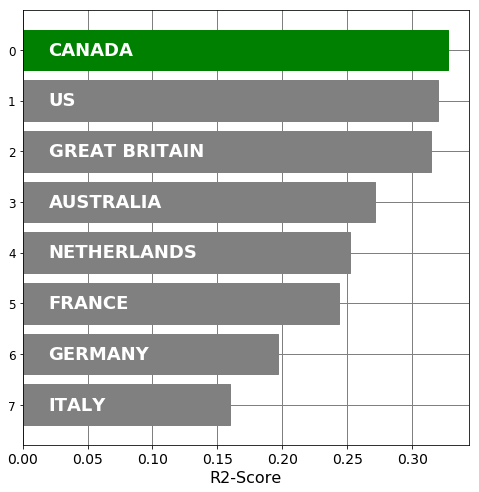

In [47]:
# Make a bar chart
character = ('CANADA',
             'US',
             'GREAT BRITAIN',
             'AUSTRALIA', 
             'NETHERLANDS',
             'FRANCE',
             'GERMANY',
             'ITALY')
y_pos = np.arange(8)
type_character = [0.3273411319309155,
                  0.320028139296918,
                  0.31418039815233123,
                  0.2715820837463585,
                  0.2524743901759854,
                  0.24338995186336407, 
                  0.19659568557898718,
                  0.15968396438438126]    

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

for i, p in enumerate(character):
    ax.text(s=p, x=0.02, y=i, color="w", verticalalignment="center", fontsize=18, fontweight='bold')
barlist = ax.barh(y_pos, type_character, align='center')
barlist[0].set_color('green')
barlist[1].set_color('gray')
barlist[2].set_color('gray')
barlist[3].set_color('gray')
barlist[4].set_color('gray')
barlist[5].set_color('gray')
barlist[6].set_color('gray')
barlist[7].set_color('gray')

# plt.yticks(y_pos, character)
# plt.yticks(rotation=45)
#plt.ylabel('Market')
plt.xlabel('R2-Score', fontsize='16')
#plt.title('In what market was the model performing the best?')
ax.invert_yaxis() 

#plt.rc('axes', titlesize=16)     
#plt.rc('axes', labelsize=14)    
#plt.rc('xtick', labelsize=14)   
#plt.rc('ytick', labelsize=12)
#plt.rc('figure', titlesize=14)  

plt.grid()
ax.grid(color='grey', linestyle='-', linewidth=1)

plt.show()